# Analyzing Subreddit Posts for AppleWatch and Galaxy Watch 

Performing exploratory data analysis (EDA) and preprocessing on the collected data from the AppleWatch and Galaxy Watch subreddits is a crucial step for gaining insights, understanding the data, and preparing it for further analysis and modeling.

During the exploratory data analysis phase, we will analyze the characteristics and properties of the subreddit posts by examining various aspects such as post length, word frequency, and sentiment to gain a deeper understanding of the data. By visualizing and summarizing the data, we can identify patterns, trends, and potential challenges that may impact our modeling process.

In the preprocessing stage, we will address data quality and consistency issues. This includes handling missing values, cleaning and standardizing the text data, and addressing duplicates or irrelevant content. We will also perform feature engineering to extract meaningful features from the text data that can improve the predictive power of our models. These features may include word counts, sentiment scores, or other domain-specific indicators.

## Contents:

- [Analyzing Subreddit Posts for AppleWatch and Galaxy Watch](#Analyzing-Subreddit-Posts-for-AppleWatch-and-Galaxy-Watch)
- [Imports](#Imports)
- [Functions](#Functions)
- [Exploatory Data Analysis (EDA) and Preprocessing](#Exploatory-Data-Analysis-(EDA)-and-Preprocessing)
- [Save The Final Dataset](#Save-The-Final-Dataset)
- [Sentimental Analysis](#Sentimental-Analysis)
- [Summary of EDA, Preprocessing and Sentimental Analysis](#Summary-of-EDA,-Preprocessing-and-Sentimental-Analysis)

## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", None)

In [26]:
# Define the path of each dataset
samsung_path = "../data/samsung.csv"
apple_path = "../data/apple.csv"

## Functions

In [27]:
# Function for making histogram 
def length_distribution(column, title, x_label, num_bins, color):        
    plt.figure(figsize=(10,8))
    plt.hist(column, bins = num_bins, color = color, edgecolor = "black")

    #Add chart labels
    plt.title(title, fontsize=13)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Number of Frequency", fontsize=12);

In [28]:
# Define the function for cleaning the text
def text_preprocess(text):
    
    # Convert sentences into lowercase
    text["description"] = text["description"].apply(lambda c: c.lower())
    
    # Remove special characters and numbers present in the text
    text["description"] = text["description"].apply(lambda c: c.replace("[^A-Za-z]",""))
    
    # Remove punctuations in the text
    #text['caption'] = text['caption'].apply(lambda c: c.replace("!()-[]{};:\,<=>./?@#$%^&*_~''", ''))
        
    # Remove extra spaces
    text["description"] = text["description"].apply(lambda c: c.replace("\s+"," "))
    
    # Remove single characters
    text["description"] = text["description"].apply(lambda c: " ".join([word for word in c.split() if len(word)>1]))
    
    # Remove stop words
    #text["description"] = text["description"].apply(lambda c: " ".join([word for word in c.split() if word not in stopwords.words("english")]))
    
    # Stemming words
    #ps = PorterStemmer()
    
    #text["description"] = text["description"].apply(lambda c: " ".join([ps.stem(word) for word in c.split()]))
        
    return text

In [29]:
# Function for instantiating CountVectorizer, fit and transform on corpus and finaly plot the most occurred words 
def vectorizing_df(column, ngram_range, dfname, color):
    X = column
    cvec = CountVectorizer(stop_words="english", ngram_range=ngram_range)
    cvec.fit(X)
    X = cvec.transform(X)

    # convert X to dataframe
    df_vec = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
    print(f"Number of tokens after applying CountVectorizer on {dfname} Dataframe: {df_vec.shape[1]}")

    # plot most occured words
    df_vec.sum().sort_values(ascending=False).head(20).plot(kind="barh",
                            color = color, edgecolor = "black")
    plt.title(f"Most words in Posts of {dfname}", fontsize=12)
    plt.xlabel("Number of Words", fontsize=10)
    plt.ylabel("Words", fontsize=10);

## Exploatory Data Analysis (EDA) and Preprocessing

### Overview:

> **Missing Values Handling and Feature Engineering:**
We start by addressing missing values in the "title" and "selftext" features. Any missing values in these features are filled with empty values. Additionally, we work on removing noises that may exist in the text data. We then utilize feature engineering techniques to create a new column called "description" by combining the "title" and "selftext" features. This allows us to capture the complete information even when either the title or selftext is empty for certain observations.
>
>
> **Drop Unuseful Columns:**
The datasets for both Apple Watch and Samsung Galaxy Watch contain over 98 columns, but we focus on two key variables: "title" (the post title) and "selftext" (the post description). We consider these variables as valuable for our analysis.
>
>
> **Handling Duplicates:**
We identify and handle duplicate posts within the dataset. Since there may be posts generated by the same author in our datasets, we remove these duplicates to ensure that each observation represents unique and distinct user-generated content. This helps avoid biases and maintains the integrity of our analysis.
>
>
> **Text Data Preprocessing:**
To ensure the quality and consistency of our text data, we apply preprocessing techniques. This includes removing punctuation, converting the text to lowercase, removing extra spaces, and eliminating single-letter words. These preprocessing steps help standardize the text data and prepare it for further analysis and modeling.
>
>
> **Post Length Distribution:**
We analyze the distribution of post lengths in both the Apple Watch and Samsung Galaxy Watch subreddits. This analysis provides insights into the typical length of posts and helps us identify any outliers or patterns that may be relevant for subsequent analysis. Understanding the distribution of post lengths can aid in determining the appropriate text analysis techniques and model selection.
>
>
> **Word Frequency Analysis:**
We conduct word frequency analysis within each subreddit to identify the most commonly used words. This analysis helps us understand the prevalent topics, discussions, and vocabulary within each subreddit. By identifying the frequently occurring words, we can gain insights into the interests and preferences of users discussing Apple Watch and Samsung Galaxy Watch.
>

Overall, through exploratory data analysis and preprocessing, we gain a deeper understanding of the data, handle missing values, perform text data preprocessing, address duplicates, analyze post lengths, and explore word frequency. These steps set the foundation for building accurate and effective machine learning models to predict the subreddit based on the content of the posts, ultimately enabling us to extract valuable insights about the Apple Watch and Samsung Galaxy Watch communities.

### Samsung Galaxy Watch

In [30]:
# load data
df_samsung = pd.read_csv(samsung_path).drop(columns="Unnamed: 0")

# Get some basic information 
print(f"Sample Data :{df_samsung.head()}")
print(f"\n--------------------------\n\n Columns : {[i for i in df_samsung.columns]}")
print(f"\n--------------------------\n\n Size of the dataset : {df_samsung.shape[0]}")
print(f"\n--------------------------\n\n Total number of columns : {df_samsung.shape[1]}")

Sample Data :     subreddit  \
0  GalaxyWatch   
1  GalaxyWatch   
2  GalaxyWatch   
3  GalaxyWatch   
4  GalaxyWatch   

                                                                                                                                                                                                                                                                                                                                                                                                                                 selftext  \
0                                                                                                          Hey! Join me this month for the fitness challenge.  This is a big month for me and I am going to need support and motivation in the following months. I'd appreciate it!\n\nJoin the Lavender, May challenge! Get special badges and get fit with a community in Samsung Health Together https://shealth.samsung.com/s/pyPFbND   
1                   

### Missing Values Handling and Feature Engineering

In [31]:
# Check the missing values in selftext with theire equivalents in title
print(f"Number of missing values in title column: {df_samsung['title'].isna().sum()}")
print(f"Number of missing values in selftext column: {df_samsung['selftext'].isna().sum()}")

df_samsung.loc[df_samsung["selftext"].isna(), ["title", "selftext"]]

Number of missing values in title column: 0
Number of missing values in selftext column: 1141


,title,selftext
5,If i download around 2GB of spotify music in my watch 4 classic will it effect the performance of my watch?,NaN
10,Awful Battery,NaN
20,"I have a new watch 5. I can make calls on it with no problem (it's LTE); but I can't receive calls on it. When I answer on my watch, it then directs me to my phone. Also, we got them through a BOGO deal and my daughter's answers calls fine. Help please",NaN
23,Up to 80% off from Apr 26 to May 3 for the CELEST 3020 Digital Watch on the Google Play Store!,NaN
25,Pretty good battery life this weekend on my GW4 Classic,NaN
...,...,...
3489,"In the always-on mode of the Galaxy Watch active R500, the clock face is not the right size. Please fix this problem in the next updates.",NaN
3490,"Calls aren't showing 1/5 times in GW4, even when connected. Anyone else or any solutions?",NaN
3491,Aye yo wtf !?,NaN
3492,GMT master ii white gold GW4 40mm,NaN


In [32]:
# Fill missing values () in selftext with space
df_samsung["selftext"] = df_samsung["selftext"].fillna("")

# Replace "[removed]" in texts
df_samsung["selftext"] = df_samsung["selftext"].replace("[removed]", "")

# Engineering new column "description" which is the combination of title and description
df_samsung["description"] = (df_samsung["selftext"].map(str) + " " + df_samsung["title"]).str.strip()

# Check the description column
df_samsung.loc[:,["title", "selftext", "description"]]

,title,selftext,description
0,May Fitness Challenge,"Hey! Join me this month for the fitness challenge. This is a big month for me and I am going to need support and motivation in the following months. I'd appreciate it!\n\nJoin the Lavender, May challenge! Get special badges and get fit with a community in Samsung Health Together https://shealth.samsung.com/s/pyPFbND","Hey! Join me this month for the fitness challenge. This is a big month for me and I am going to need support and motivation in the following months. I'd appreciate it!\n\nJoin the Lavender, May challenge! Get special badges and get fit with a community in Samsung Health Together https://shealth.samsung.com/s/pyPFbND May Fitness Challenge"
1,What's this about?,I noticed the DISPLAY watch is better then the actual watch you buy... (Yes I am on the latest software),I noticed the DISPLAY watch is better then the actual watch you buy... (Yes I am on the latest software) What's this about?
2,Option to have notifications on watch even when off your wrist?,I got a tattoo on my wrist and my watch thinks it's not on my body so I miss notifications. \nAny setting to have us receive notifications even if the watch is charging or on our dresser? Or in my case still on my body but not detecting it?,I got a tattoo on my wrist and my watch thinks it's not on my body so I miss notifications. \nAny setting to have us receive notifications even if the watch is charging or on our dresser? Or in my case still on my body but not detecting it? Option to have notifications on watch even when off your wrist?
3,Not receiving notifications or Watch,"So when I open my galaxy wearables app, go to watch settings and click on notifications, the entire app crashes.\n\nI tried an alternate route by going to the watches settings app, then to notifications, and when I click app notifications, it says continue on phone and it does open in the phone but it says no apps. \n\nI tried rebooting the watch and the phone but nothing seems to work, help would be appreciated a lot!","So when I open my galaxy wearables app, go to watch settings and click on notifications, the entire app crashes.\n\nI tried an alternate route by going to the watches settings app, then to notifications, and when I click app notifications, it says continue on phone and it does open in the phone but it says no apps. \n\nI tried rebooting the watch and the phone but nothing seems to work, help would be appreciated a lot! Not receiving notifications or Watch"
4,GW5 and specific WiFi SSID,"I have a number of SSID's in my home for different purposes. For some reason, my watch keeps connecting to an isolated VLAN that is designed solely for the XBOX. Other than shutting the WiFi off, how do I ensure the watch does not try to connect to this particular SSID?","I have a number of SSID's in my home for different purposes. For some reason, my watch keeps connecting to an isolated VLAN that is designed solely for the XBOX. Other than shutting the WiFi off, how do I ensure the watch does not try to connect to this particular SSID? GW5 and specific WiFi SSID"
...,...,...,...
3493,Automatically given steps,"I was at the gym tonight and noticed my watch lowered my total to 1100 steps before shooting back up to my total. It is now past midnight and should be at zero, but suddenly my watch has begun today at 1100 steps. Has anyone experienced this type of error before and remedied it? I performed a factory reset, nothing changed, so I restored my backup on to the watch.","I was at the gym tonight and noticed my watch lowered my total to 1100 steps before shooting back up to my total. It is now past midnight and should be at zero, but suddenly my watch has begun today at 1100 steps. Has anyone experienced this type of error before and remedied it? I performed a factory reset, nothing changed, so I restored my backup on to the watch. Automatically given steps"
3494,Why the FUCK did Google Assistant force my watch to reset?,"Why is Google so shi

### Drop Unuseful Columns

In [33]:
# Make a new dataframe for EDA
df_galaxywatch = df_samsung.loc[:,["author", "description", "subreddit"]]
df_galaxywatch.head()

,author,description,subreddit
0,SunflowerNBarbedWire,"Hey! Join me this month for the fitness challenge. This is a big month for me and I am going to need support and motivation in the following months. I'd appreciate it!\n\nJoin the Lavender, May challenge! Get special badges and get fit with a community in Samsung Health Together https://shealth.samsung.com/s/pyPFbND May Fitness Challenge",GalaxyWatch
1,TypicalZedF,I noticed the DISPLAY watch is better then the actual watch you buy... (Yes I am on the latest software) What's this about?,GalaxyWatch
2,CCJ22,I got a tattoo on my wrist and my watch thinks it's not on my body so I miss notifications. \nAny setting to have us receive notifications even if the watch is charging or on our dresser? Or in my case still on my body but not detecting it? Option to have notifications on watch even when off your wrist?,GalaxyWatch
3,No_Pudding4739,"So when I open my galaxy wearables app, go to watch settings and click on notifications, the entire app crashes.\n\nI tried an alternate route by going to the watches settings app, then to notifications, and when I click app notifications, it says continue on phone and it does open in the phone but it says no apps. \n\nI tried rebooting the watch and the phone but nothing seems to work, help would be appreciated a lot! Not receiving notifications or Watch",GalaxyWatch
4,PhobicCarrot,"I have a number of SSID's in my home for different purposes. For some reason, my watch keeps connecting to an isolated VLAN that is designed solely for the XBOX. Other than shutting the WiFi off, how do I ensure the watch does not try to connect to this particular SSID? GW5 and specific WiFi SSID",GalaxyWatch


### Handling Duplicates

In [34]:
# Number of unique authors
print(f"Number of unique authors: {df_galaxywatch['author'].nunique()}")

# Filtering description and counting them by their authors
df_galaxywatch.groupby("author")["description"].agg(["count"]).sort_values("count", ascending = False)

Number of unique authors: 2457


,count
author,
DADAMWF,23
Own_Statement_8788,18
No-Impress3806,14
rusahitam,14
MyWatchFace,14
...,...
Nightwing55,1
NightFuryX0,1
NightAshamed,1


In [35]:
# Drop the duplicate authors
df_galaxywatch.drop_duplicates(subset="author", keep="first", inplace=True)
print(f"The size of the galaxy watch subreddit dataframe after removing duplicate authors: {df_galaxywatch.shape[0]}")

The size of the galaxy watch subreddit dataframe after removing duplicate authors: 2457


In [36]:
# Drop the duplicate descriptions
df_galaxywatch.drop_duplicates(subset="description", keep="first", inplace=True)
print(f"The size of the galaxy watch subreddit dataframe after removing duplicate descriptions: {df_galaxywatch.shape[0]}")

The size of the galaxy watch subreddit dataframe after removing duplicate descriptions: 2455


### Text Data Preprocessing

In [37]:
# Apply the text preprocessing (cleaning) function on galaxy watch descriptions
text_preprocess(df_galaxywatch)

,author,description,subreddit
0,SunflowerNBarbedWire,"hey! join me this month for the fitness challenge. this is big month for me and am going to need support and motivation in the following months. i'd appreciate it! join the lavender, may challenge! get special badges and get fit with community in samsung health together https://shealth.samsung.com/s/pypfbnd may fitness challenge",GalaxyWatch
1,TypicalZedF,noticed the display watch is better then the actual watch you buy... (yes am on the latest software) what's this about?,GalaxyWatch
2,CCJ22,got tattoo on my wrist and my watch thinks it's not on my body so miss notifications. any setting to have us receive notifications even if the watch is charging or on our dresser? or in my case still on my body but not detecting it? option to have notifications on watch even when off your wrist?,GalaxyWatch
3,No_Pudding4739,"so when open my galaxy wearables app, go to watch settings and click on notifications, the entire app crashes. tried an alternate route by going to the watches settings app, then to notifications, and when click app notifications, it says continue on phone and it does open in the phone but it says no apps. tried rebooting the watch and the phone but nothing seems to work, help would be appreciated lot! not receiving notifications or watch",GalaxyWatch
4,PhobicCarrot,"have number of ssid's in my home for different purposes. for some reason, my watch keeps connecting to an isolated vlan that is designed solely for the xbox. other than shutting the wifi off, how do ensure the watch does not try to connect to this particular ssid? gw5 and specific wifi ssid",GalaxyWatch
...,...,...,...
3493,ass_acoustics,"was at the gym tonight and noticed my watch lowered my total to 1100 steps before shooting back up to my total. it is now past midnight and should be at zero, but suddenly my watch has begun today at 1100 steps. has anyone experienced this type of error before and remedied it? performed factory reset, nothing changed, so restored my backup on to the watch. automatically given steps",GalaxyWatch
3494,Valiantay,"why is google so shit? simply enabling the assistant on my watch forced it to disconnect and now it requires complete reset. this is why people switch to apple, bullshit like this. why the fuck did google assistant force my watch to reset?",GalaxyWatch
3495,sleemldj,how can get nike run club app to work on my watch pro please? nike run club,GalaxyWatch
3496,elementfan94,looking for omega speedmaster moonphase in black color. can only find it in blue. any links to it? if not i'm happy with dms too. looking for omega speedmaster moonphase watchface,GalaxyWatch


### Post Length Distribution

In [38]:
# Engineering a new column to show word count of description
df_galaxywatch["des_word_count"] = df_galaxywatch["description"].str.split().str.len()

# Five longest descriptions
df_galaxywatch.sort_values(by = "des_word_count", ascending=False).head()

author  \
3335      baiduelectronics   
1606        sonicintrusion   
2276  Alcoholfreeliketwice   
2348              Gadgety1   
818               jayfiled   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [39]:
# Five shortest description
df_galaxywatch.sort_values(by = "des_word_count", ascending=False).tail()

,author,description,subreddit,des_word_count
935,teachertmh,did it,GalaxyWatch,2
605,Appropriate_Eye5063,looking nice,GalaxyWatch,2
1373,Tonnicle02,glaz band,GalaxyWatch,2
2650,CheapScientist5603,malware,GalaxyWatch,1
2039,Independent-Elk9983,opinions?,GalaxyWatch,1


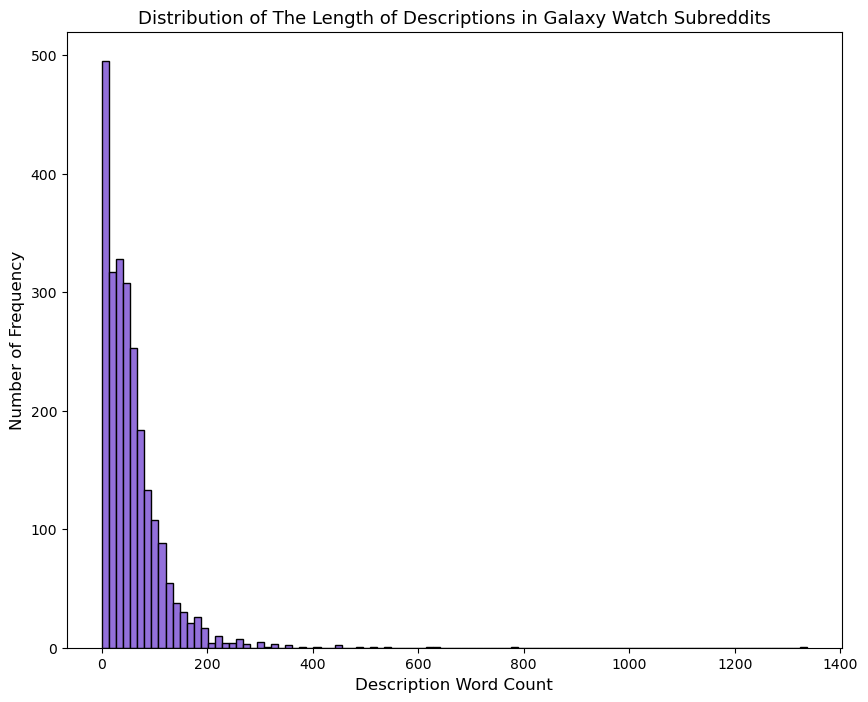

In [40]:
# Distribution of description length based on word count
length_distribution(column=df_galaxywatch["des_word_count"],
                    title="Distribution of The Length of Descriptions in Galaxy Watch Subreddits",
                    x_label="Description Word Count",
                    num_bins=100, color="mediumpurple")

**Above Plot shows us that most of the descriptions for Galaxy Watches are less that 100 words**

### Word Frequency Analysis

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of tokens after applying CountVectorizer on Galaxy Watch Dataframe: 123648


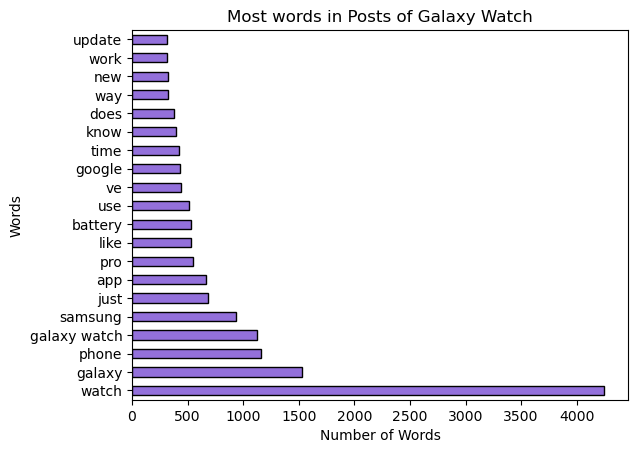

In [41]:
# Plot the 20 most occured words
vectorizing_df(column=df_galaxywatch["description"],
               ngram_range=(1,3), dfname="Galaxy Watch", color="mediumpurple")

**Above plot shows us besides expected words like "watch", "galaxy", "phone", "google" and "samsung", other frequent words such as "app", "battery", "update" and "pro" are common topics of discussion within the Galaxy Watch subreddit community.**

### Apple Watch

In [42]:
# Load data
df_apple = pd.read_csv(apple_path).drop(columns="Unnamed: 0")

# Get some basic information 
print(f"Sample Data :{df_apple.head()}")
print(f"\n--------------------------\n\n Columns : {[i for i in df_apple.columns]}")
print(f"\n--------------------------\n\n Size of the dataset : {df_apple.shape[0]}")
print(f"\n--------------------------\n\n Total number of columns : {df_apple.shape[1]}")

Sample Data :    subreddit  \
0  AppleWatch   
1  AppleWatch   
2  AppleWatch   
3  AppleWatch   
4  AppleWatch   

                                                                                                                                                                                                                                                                                                      selftext  \
0                                                                                                                                           \nyes, it's an LTE watch with data turned on, no phone with my. streaming music to my airpods - but all the music is downloaded on my watch. this is infuriating..   
1                                                                                                                                                                                                                                                                               

### Missing Values Handling and Feature Engineering

In [43]:
# Check the missing values in selftext with theire equivalents in title
print(f"Number of missing values in title column: {df_apple['title'].isna().sum()}")
print(f"Number of missing values in selftext column: {df_apple['selftext'].isna().sum()}")

df_apple.loc[df_apple["selftext"].isna(), ["title", "selftext"]]

Number of missing values in title column: 0
Number of missing values in selftext column: 1142


,title,selftext
1,How accurate is the active/total calorie tracking on the AW?,NaN
3,Pls tell me i‘m not the only one who has such a fast heartrate doing nothing,NaN
4,Deleted Apps in Watch App on iPhone with weird names - is a way to remove them ?,NaN
5,What is this complication?,NaN
7,Series 8 midnight with oem link bracelet,NaN
...,...,...
3483,is 92% battery health good for a second hand apple watch series 4 that i purchased about a year ago?,NaN
3488,"Now I can use the watch with peace of mind of not hitting the walls! OtterBox Exo Edge, great case.",NaN
3490,Purchased the AW S8 in starlight with the chalk pink band! I love it! Debating on returning for the 45mm…,NaN
3496,"First time testing clockology, fun app",NaN


In [44]:
# Fill missing values () in selftext with space
df_apple["selftext"] = df_apple["selftext"].fillna("")

# Replace "[removed]" in texts
df_apple["selftext"] = df_apple["selftext"].replace("[removed]", "")

# Engineering new column "description" which is the combination of title and description
df_apple["description"] = (df_apple["selftext"].map(str) + " " + df_apple["title"]).str.strip()

# Check the description column
df_apple.loc[:,["title", "selftext", "description"]]

,title,selftext,description
0,why is my S7 going from almost fully charged to 5% and turning itself off during a 1 hour run?,"\nyes, it's an LTE watch with data turned on, no phone with my. streaming music to my airpods - but all the music is downloaded on my watch. this is infuriating..","yes, it's an LTE watch with data turned on, no phone with my. streaming music to my airpods - but all the music is downloaded on my watch. this is infuriating.. why is my S7 going from almost fully charged to 5% and turning itself off during a 1 hour run?"
1,How accurate is the active/total calorie tracking on the AW?,,How accurate is the active/total calorie tracking on the AW?
2,Lost watch when blackout drunk,"Fell very hard blackout drunk and lost watch. Three days later I got up from bed and found it, thanks to Find My Watch!Couple scratches here and there but I’m just too grateful for finding it. \n\nJust saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!!","Fell very hard blackout drunk and lost watch. Three days later I got up from bed and found it, thanks to Find My Watch!Couple scratches here and there but I’m just too grateful for finding it. \n\nJust saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!! Lost watch when blackout drunk"
3,Pls tell me i‘m not the only one who has such a fast heartrate doing nothing,,Pls tell me i‘m not the only one who has such a fast heartrate doing nothing
4,Deleted Apps in Watch App on iPhone with weird names - is a way to remove them ?,,Deleted Apps in Watch App on iPhone with weird names - is a way to remove them ?
...,...,...,...
3494,LPT: Not sure your band is titanium? Use a magnet.,"Stainless steel is magnetic, titanium is not. \n\nSellers are scamming with &gt;$60 stainless steel bands sold as titanium. This helped me get a refund from Bezeli.","Stainless steel is magnetic, titanium is not. \n\nSellers are scamming with &gt;$60 stainless steel bands sold as titanium. This helped me get a refund from Bezeli. LPT: Not sure your band is titanium? Use a magnet."
3495,Trying to find specific watch face (pic included),Feel like this is a really dumb question but for the life of me I can't figure it out.\n\nI got a new Apple Watch Series 8 and I specifically wanted to have this look:\n\nhttps://i.imgur.com/fUspHs2.png\n\n...but I can't find what face that is or how to modify an existing face.\n\nAm I missing something?\n\nThanks!,Feel like this is a really dumb question but for the life of me I can't figure it out.\n\nI got a new Apple Watch Series 8 and I specifically wanted to have this look:\n\nhttps://i.imgur.com/fUspHs2.png\n\n...but I can't find what face that is or how to modify an existing face.\n\nAm I missing something?\n\nThanks! Trying to find specific watch face (pic included)
3496,"First time testing clockology, fun app",,"First time testing clockology, fun app"
3497,Sleep paralysis and AW,,Sleep paralysis and AW


### Drop Unuseful Columns

In [45]:
# Make a new dataframe for EDA
df_applewatch = df_apple.loc[:,["author", "description", "subreddit"]]
df_applewatch.head()

,author,description,subreddit
0,TuaAnon,"yes, it's an LTE watch with data turned on, no phone with my. streaming music to my airpods - but all the music is downloaded on my watch. this is infuriating.. why is my S7 going from almost fully charged to 5% and turning itself off during a 1 hour run?",AppleWatch
1,DemandScary1934,How accurate is the active/total calorie tracking on the AW?,AppleWatch
2,Vinumite,"Fell very hard blackout drunk and lost watch. Three days later I got up from bed and found it, thanks to Find My Watch!Couple scratches here and there but I’m just too grateful for finding it. \n\nJust saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!! Lost watch when blackout drunk",AppleWatch
3,Damarou,Pls tell me i‘m not the only one who has such a fast heartrate doing nothing,AppleWatch
4,ThorNike13,Deleted Apps in Watch App on iPhone with weird names - is a way to remove them ?,AppleWatch


### Handling Duplicates

In [46]:
# Number of unique authors
print(f"Number of unique authors: {df_applewatch['author'].nunique()}")

# Filtering description and counting them by their authors
df_applewatch.groupby("author")["description"].agg(["count"]).sort_values("count", ascending = False)

Number of unique authors: 2817


,count
author,
JJJJounol,10
Captain-DK,9
RunningM8,9
p_r96,8
MasBoy3000,8
...,...
Omhire,1
OneFutureOfMany,1
OnePunchDoge,1


In [47]:
# Drop the duplicate authors
df_applewatch.drop_duplicates(subset="author", keep="first", inplace=True)
print(f"The size of the applewatch subreddit dataframe after removing duplicate authors: {df_applewatch.shape[0]}")

The size of the applewatch subreddit dataframe after removing duplicate authors: 2817


In [48]:
# Drop the duplicate descriptions
df_applewatch.drop_duplicates(subset="description", keep="first", inplace=True)
print(f"The size of the applewatch subreddit dataframe after removing duplicate descriptions: {df_applewatch.shape[0]}")

The size of the applewatch subreddit dataframe after removing duplicate descriptions: 2815


### Text Data Preprocessing

In [49]:
# Apply the text preprocessing (cleaning) function on applewatch descriptions
text_preprocess(df_applewatch)

,author,description,subreddit
0,TuaAnon,"yes, it's an lte watch with data turned on, no phone with my. streaming music to my airpods but all the music is downloaded on my watch. this is infuriating.. why is my s7 going from almost fully charged to 5% and turning itself off during hour run?",AppleWatch
1,DemandScary1934,how accurate is the active/total calorie tracking on the aw?,AppleWatch
2,Vinumite,"fell very hard blackout drunk and lost watch. three days later got up from bed and found it, thanks to find my watch!couple scratches here and there but i’m just too grateful for finding it. just saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!! lost watch when blackout drunk",AppleWatch
3,Damarou,pls tell me i‘m not the only one who has such fast heartrate doing nothing,AppleWatch
4,ThorNike13,deleted apps in watch app on iphone with weird names is way to remove them,AppleWatch
...,...,...,...
3493,actuarialstudent_88,"i’ve been wearing my apple watch series for over month. this morning saw that from around to am while was sleeping, my heart rate was recorded of 130bpm during that hour while it was 60-70 before and after that. however didn’t see any high heart rate notification although set it for any hr above 120. also the watch didn’t track my sleep last night so couldn’t check what stage of sleep was in. i’m wondering if anyone went through this before and is this just glitch or an issue? thanks in advance! high heart rate recorded during sleep",AppleWatch
3494,Metatropico,"stainless steel is magnetic, titanium is not. sellers are scamming with &gt;$60 stainless steel bands sold as titanium. this helped me get refund from bezeli. lpt: not sure your band is titanium? use magnet.",AppleWatch
3495,HarpuaFSB,feel like this is really dumb question but for the life of me can't figure it out. got new apple watch series and specifically wanted to have this look: https://i.imgur.com/fusphs2.png ...but can't find what face that is or how to modify an existing face. am missing something? thanks! trying to find specific watch face (pic included),AppleWatch
3497,Osran94,sleep paralysis and aw,AppleWatch


### Post Length Distribution

In [50]:
# Engineering a new column to show word count of description
df_applewatch["des_word_count"] = df_applewatch["description"].str.split().str.len()

# Five longest descriptions
df_applewatch.sort_values(by = "des_word_count", ascending=False).head()

author  \
591             sathomasga   
320   AccomplishedWindow49   
257                obyboby   
722            onetonenote   
2998             PolarSuns   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [51]:
# Five shortest description
df_applewatch.sort_values(by = "des_word_count", ascending=False).tail()

,author,description,subreddit,des_word_count
2818,-Guido-K,proud,AppleWatch,1
2863,chrizm32,buh-bam!,AppleWatch,1
1963,youtubeguru0,https://music.apple.com/us/album/destination-beautiful-single/1678004647,AppleWatch,1
416,LividFlow9228,ssssssssssssssssssssssssssssssssssssssssssssssss,AppleWatch,1
316,Snoo_79802,ok,AppleWatch,1


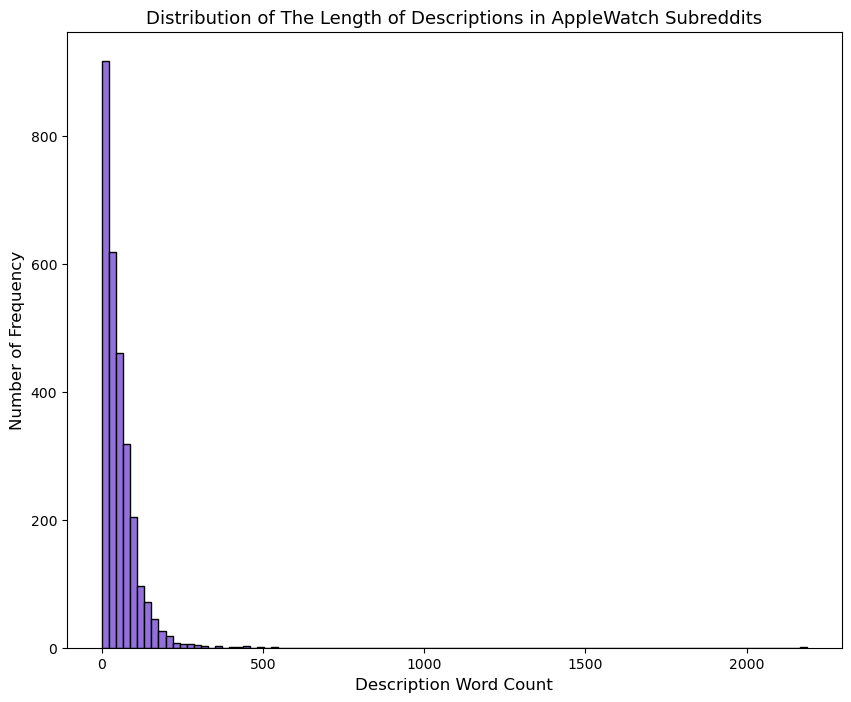

In [52]:
# Distribution of description length based on word count
length_distribution(column=df_applewatch["des_word_count"],
                    title="Distribution of The Length of Descriptions in AppleWatch Subreddits",
                    x_label="Description Word Count",
                    num_bins=100, color="mediumpurple")

**Above Plot shows us that most of the descriptions for AppleWatches are less that 100 words**

### Word Frequency Analysis

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of tokens after applying CountVectorizer on AppleWatch Dataframe: 130301


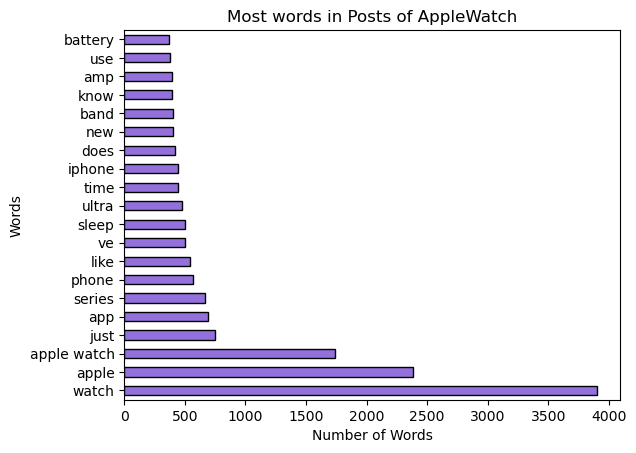

In [53]:
# Plot the 20 most occured words
vectorizing_df(column=df_applewatch["description"],
               ngram_range=(1,3), dfname="AppleWatch", color="mediumpurple")

**Above plot shows us besides expected words like "watch", "apple", "applewatch" and "phone", other frequent words such as "app", "serries", "sleep", "ultra" and "band" and "battery" are common topics of discussion within the AppleWatch subreddit community.**

## Save The Final Dataset

In [54]:
# Combine Applewatch and Galaxy Watch datasets
df = pd.concat([df_applewatch, df_galaxywatch], axis=0)

# Get the size and ratio of subreddits in final dataset
print(f"Size of the final dataset: {df.shape[0]}\n")
print(" Ratio of Subreddits ".center(38, "="))
print(df["subreddit"].value_counts(normalize=True))
df.head()

Size of the final dataset: 5270

======== Ratio of Subreddits =========
AppleWatch     0.534156
GalaxyWatch    0.465844
Name: subreddit, dtype: float64


,author,description,subreddit,des_word_count
0,TuaAnon,"yes, it's an lte watch with data turned on, no phone with my. streaming music to my airpods but all the music is downloaded on my watch. this is infuriating.. why is my s7 going from almost fully charged to 5% and turning itself off during hour run?",AppleWatch,48
1,DemandScary1934,how accurate is the active/total calorie tracking on the aw?,AppleWatch,10
2,Vinumite,"fell very hard blackout drunk and lost watch. three days later got up from bed and found it, thanks to find my watch!couple scratches here and there but i’m just too grateful for finding it. just saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!! lost watch when blackout drunk",AppleWatch,59
3,Damarou,pls tell me i‘m not the only one who has such fast heartrate doing nothing,AppleWatch,15
4,ThorNike13,deleted apps in watch app on iphone with weird names is way to remove them,AppleWatch,15


In [55]:
# Save and export the final dataset
df.to_csv("../data/final_dataset.csv")

## Sentimental Analysis
Sentiment analysis is a natural language processing (NLP) technique that aims to determine the sentiment or emotional tone expressed in a piece of text. It involves analyzing the subjective information present in the text and classifying it as positive, negative, or neutral.

VADER is a popular and widely used lexicon-based sentiment analysis tool. It was specifically developed for analyzing sentiments in social media text. VADER combines a sentiment lexicon with a set of grammatical rules to accurately measure sentiment intensity. It can handle informal language, emoticons, and even negations, which are common in social media data.

What makes VADER particularly useful is its ability to handle contextual information and nuances in sentiment expression. It not only considers individual words but also takes into account the effects of punctuation, capitalization, and conjunctions. This makes VADER effective in capturing the sentiment in short and informal texts, such as social media posts or customer reviews.

In our project, sentiment analysis using VADER can help us gauge the sentiment of the posts made by users. By analyzing the sentiment, we can understand the overall opinion or emotional tone of the discussions within the subreddit. This information can be valuable for predicting trends, identifying user satisfaction or dissatisfaction, or understanding user preferences regarding Apple Watch and Galaxy Watch products.

The compound score, generated by the VADER sentiment analyzer, represents the overall sentiment polarity of a given text. It takes into account the individual sentiment scores of the text's words and combines them to provide an overall sentiment score.

The compound score ranges between -1 and 1, where:

- Scores above 0 indicate a positive sentiment.
- Scores below 0 indicate a negative sentiment.
- Scores around 0 indicate a neutral sentiment.

The magnitude of the compound score represents the intensity of the sentiment. The closer the score is to -1 or 1, the stronger the sentiment expressed in the text.

In [56]:
# Make a copy of original final dataset
df_sentiment = df.copy()

# Instantiat the VADER
sa = SentimentIntensityAnalyzer()

# Add two columns for sentiment polarity scores and category
corpus = df_sentiment["description"]
sentiment_scores = [sa.polarity_scores(document)["compound"] for document in corpus]
sentiment_category = ["positive" if score > 0
                                     else "negative" if score < 0
                                     else "neutral"
                                     for score in sentiment_scores]
df_sentiment["sentiment_scores"] = sentiment_scores
df_sentiment["sentiment_category"] = sentiment_category
df_sentiment.head()

,author,description,subreddit,des_word_count,sentiment_scores,sentiment_category
0,TuaAnon,"yes, it's an lte watch with data turned on, no phone with my. streaming music to my airpods but all the music is downloaded on my watch. this is infuriating.. why is my s7 going from almost fully charged to 5% and turning itself off during hour run?",AppleWatch,48,-0.2434,negative
1,DemandScary1934,how accurate is the active/total calorie tracking on the aw?,AppleWatch,10,0.0000,neutral
2,Vinumite,"fell very hard blackout drunk and lost watch. three days later got up from bed and found it, thanks to find my watch!couple scratches here and there but i’m just too grateful for finding it. just saying, your watch can drop even from your wrist if you are way too drunk, be careful everyone!!! lost watch when blackout drunk",AppleWatch,59,-0.8670,negative
3,Damarou,pls tell me i‘m not the only one who has such fast heartrate doing nothing,AppleWatch,15,0.0772,positive
4,ThorNike13,deleted apps in watch app on iphone with weird names is way to remove them,AppleWatch,15,-0.1779,negative


In [57]:
# Describe the setiment scores by subreddits
df_sentiment.groupby("subreddit")["sentiment_scores"].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
AppleWatch,2815.0,0.207456,0.511688,-0.9900,0.00000,0.2023,0.66960,0.9998
GalaxyWatch,2455.0,0.186882,0.513903,-0.9882,-0.09395,0.1299,0.64065,0.9994


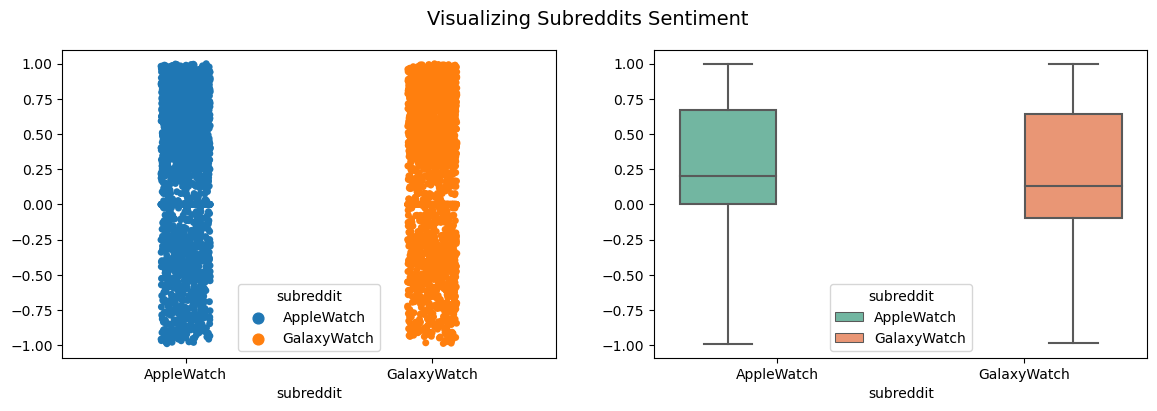

In [58]:
# Plot the spread of sentiment polarity
# Cite: Got below codes form https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.htm
# Cite: ldipanjanS/nlp_strategy_26.py
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x=df_sentiment["subreddit"], y=sentiment_scores, 
                   hue=df_sentiment["subreddit"], data=df_sentiment, ax=ax1)
bp = sns.boxplot(x=df_sentiment["subreddit"], y=sentiment_scores, 
                 hue=df_sentiment["subreddit"], data=df_sentiment, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Subreddits Sentiment', fontsize=14)

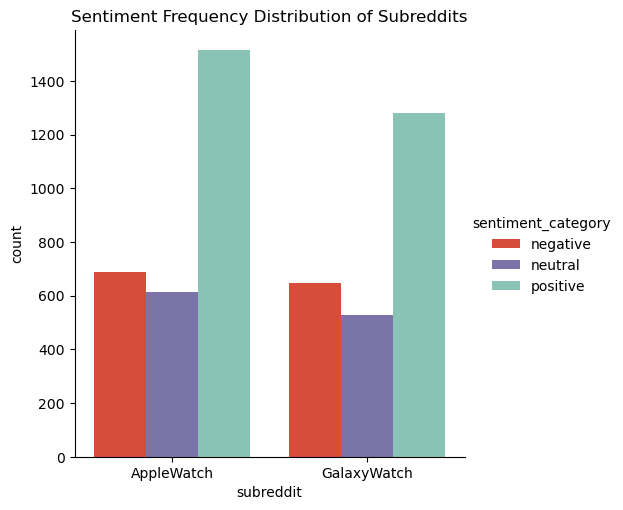

In [73]:
# Plot the frequency of sentiments
# Cite: Got below codes form https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.htm
# Cite: ldipanjanS/nlp_strategy_26.py
# Cite: Got the colors from https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
fc = sns.factorplot(x="subreddit", hue="sentiment_category", 
                    data=df_sentiment, kind="count", 
                    palette={"negative": "#f03b20", 
                             "positive": "#7fcdbb", 
                             "neutral": "#756bb1"})
plt.title("Sentiment Frequency Distribution of Subreddits");

In [69]:
# Check the most positive and negative posts in AppleWatch subreddit
apple_pos = (df_sentiment["subreddit"]=="AppleWatch") & (df_sentiment["sentiment_scores"] == 0.9998)
apple_neg = (df_sentiment["subreddit"]=="AppleWatch") & (df_sentiment["sentiment_scores"] == -0.9900)

print(" Most Negative Post in AppleWatch Subreddit ".center(70, "="))
print()
print(df_sentiment.loc[apple_neg, "description"])
print()
print(" Most Negative Post in AppleWatch Subreddit ".center(70, "="))
print()
print(df_sentiment.loc[apple_pos, "description"])

============= Most Negative Post in AppleWatch Subreddit =============

1768    pairing new apple watch is something fucking dread every single time. bought new watch week ago, and didn’t open the box until today because knew i’d need solid two hours just to get the damn thing working. don’t get me started on the fact that if the watch has its own number… it just doesn’t work. have to call the cell phone company every single time. there was also prompt that told me needed to “unpair” my watch and repair it to get the cellular connection to work. guess what that did? put me through the entire fucking setup process again. love apple products. but fucking hell, this is the worst god damn apple experience can imagine. fuckkkkk holy fucking shit, why in the fuck is it such pain in the ass to pair new apple watch with my phone every single time?
Name: description, dtype: object

============= Most Negative Post in AppleWatch Subreddit =============

591    disclaimer: want to be very clear f

In [70]:
# Check the most positive and negative posts in Galaxy Watch subreddit
galaxy_pos = (df_sentiment["subreddit"]=="GalaxyWatch") & (df_sentiment["sentiment_scores"] == 0.9994)
galaxy_neg = (df_sentiment["subreddit"]=="GalaxyWatch") & (df_sentiment["sentiment_scores"] == -0.9882)

print(" Most Negative Post in Galaxy Watch Subreddit ".center(70, "="))
print()
print(df_sentiment.loc[galaxy_neg, "description"])
print()
print(" Most Negative Post in Galaxy Watch Subreddit ".center(70, "="))
print()
print(df_sentiment.loc[galaxy_pos, "description"])

============ Most Negative Post in Galaxy Watch Subreddit ============

2961    i've had my galaxy watch5 44mm for little over month now. the reviews on reddit and elsewhere seemed to be mostly positive but i'm blown away by the poor performance almost across the board. fitness/sleep/health tracking, responsiveness and battery life are all substantially worse than expected. \- battery life is well under 24h from day one unless most features are disabled, including things i'd consider "base functionality" like continuous heartrate monitoring. \- touch screen has noticeable latency from day one, especially when trying to cycle between screens. the face completely freezes for second or so if try to cycle through them quickly. \- sleep tracking quality is very poor. sleep is also often arbitrarily separated into many smaller "naps", each with poor sleep scores, that can't be combined, making the metrics useless (afaik at least, the edit feature doesn't let me do anything in my samsung heal

## Summary of EDA, Preprocessing and Sentimental Analysis

- Explored and preprocessed data from the Apple Watch and Samsung Galaxy Watch subreddits, focusing on the "title" and "selftext" features.
- Handled missing values by filling them with empty entries and removed noise and irrelevant information.
- Created a new feature called "description" by combining the "title" and "selftext" components.
- Preprocessed the text data by removing punctuation, converting to lowercase, and eliminating extra spaces and single-letter words.
- Addressed duplicate posts to ensure data integrity.
- Analyzed post length distribution and examined word frequency to identify prevalent topics.
- Performed sentiment analysis using VADER to classify posts as positive, negative, or neutral and utilized the compound score from VADER to gauge overall sentiment polarity.
- Prepared the data for further analysis and modeling.

Overall, the process of exploratory data analysis and preprocessing included handling missing values, removing duplicates, analyzing post length distribution and word frequency, and performing sentiment analysis. These steps were crucial in cleaning and preparing the data for subsequent modeling tasks, ensuring data quality and enhancing the accuracy and effectiveness of the models.